In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import xarray as xa
import rioxarray as rio
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pathlib import Path
import pathlib
from tqdm import tqdm
from scipy.ndimage import binary_dilation, generic_filter

import netCDF4
import json

from coralshift.utils import file_ops, directories
from coralshift.dataloading import bathymetry
from coralshift.processing import data

In [6]:
# all_climate = file_ops.load_merge_nc_files("/Volumes/MRes Drive/global_ocean_reanalysis/monthly_means/baseline_area")
gopr = xa.open_dataset("/Volumes/MRes Drive/global_ocean_reanalysis/monthly_means/baseline_area/coral_climate_1_12.nc")

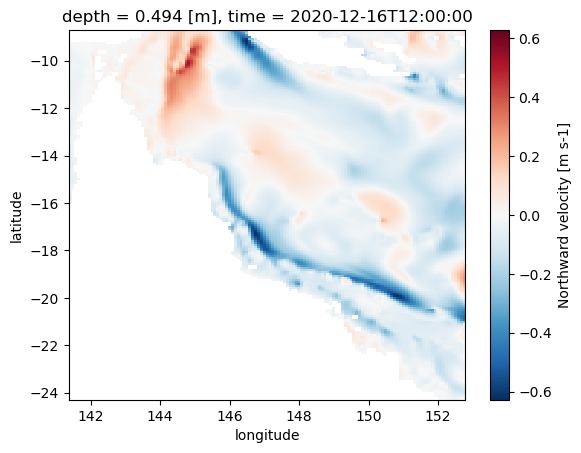

In [9]:
gopr["vo"].isel(time=-1).plot()

In [6]:
all_climate.to_netcdf("/Volumes/MRes Drive/global_ocean_reanalysis/monthly_means/baseline_area/gopr_monthly_means_total_area.nc")

In [ ]:
time = xa.cftime_range(start='2022-01-01', end='2022-01-05', freq='D')

# create lat and lon coordinates
lat = np.linspace(-90, 90, 5)
lon = np.linspace(-180, 180, 5)

# create random data for each coordinate
# create random data for each variable and coordinate
data1 = np.random.rand(len(time), len(lat), len(lon))
data2 = np.random.rand(len(time), len(lat), len(lon))
data3 = np.random.rand(len(time), len(lat), len(lon))

# create xarray dataset with time, lat, and lon as coordinates
ds = xa.Dataset({'data1': (['time', 'lat', 'lon'], data1),
                 'data2': (['time', 'lat', 'lon'], data2),
                 'data3': (['time', 'lat', 'lon'], data3)},
                coords={'time': time,
                        'lat': lat,
                        'lon': lon})


# stacked.transpose('time','points').as_numpy()

# np.shape(stacked['data1'].transpose('time','points').to_numpy())

def stacking(ds):
    stacked = ds.stack(points=('lat', 'lon'))
    
    vars_list = list(ds.variables)
    # stack= stacked[vars_list[0]].to_numpy()
    vals = []
    for d in vars_list[:3]:
        vals.append(stacked[d].to_numpy())
        # vals = stacked[d].transpose('time','points').to_numpy()
        # stack = np.stack([stack, vals], axis=1)

    return vals

out = stacking(ds)

In [ ]:
ds

In [ ]:
ds_stacked = ds.stack(location=('lat', 'lon'))
ds_stacked


In [ ]:
list(ds.variables)

In [ ]:



temp = []
for dim in list(ds.variables)[:3]:
    vals = ds_stacked[dim].values
    temp.append(vals)

# move location to first column
swapped=np.moveaxis(temp,2,0)


In [ ]:
np.shape(temp)

In [ ]:
np.shape(swapped[:,:,4])

In [ ]:
data1_array = ds_stacked['data1'].values
np.shape(data1_array)

In [ ]:
concatenated = np.concatenate(temp, axis=1)

In [ ]:
np.shape(concatenated)

In [ ]:
transposed = np.transpose(out, (2, 1, 0))
reshaped = np.reshape(transposed, (25, 5, 3))


In [ ]:
np.shape(reshaped[2])

In [ ]:
out[0]

# Climate data imports

### Climatology Monthly Means
[Source](https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_001_030/services): ```cmems_mod_glo_phy_my_0.083-climatology_P1M-m```

Contains the average variable values in each month of the year between 1993 and 2020.

In [ ]:
data_dict = file_ops.dict_of_ncs_from_dir("/Volumes/MRes Drive/global_ocean_reanalysis/climatology_monthly_means", engine="h5netcdf")
data_dict["mercatorglorys12v1_gl12_mean_1993_2016_05"]

In [ ]:
(data_dict["mercatorglorys12v1_gl12_mean_1993_2016_02"]).dims

In [ ]:
# flat_vars = ["zos","mlotst","bottomT","sithick","siconc","usi","vsi"]

# one = data_dict["mercatorglorys12v1_gl12_mean_1993_2016_02"][flat_vars]
# two = data_dict["mercatorglorys12v1_gl12_mean_1993_2016_03"][flat_vars]
# out = xa.concat([one,two], dim="time")
# out

In [ ]:
f,ax1=plt.subplots()
out['zos'][0].plot(ax=ax1)
ax1.axis('equal');

In [ ]:
flat_vars = ["zos","mlotst","bottomT","sithick","siconc","usi","vsi"]

month_datasets = [data_dict[month][flat_vars] for month in sorted(data_dict.keys())]

In [ ]:
for ds in month_datasets:
    print(ds.dims)

In [ ]:
month_datasets[:1][0]

In [ ]:
one = data_dict["mercatorglorys12v1_gl12_mean_1993_2016_02"][flat_vars]
two = data_dict["mercatorglorys12v1_gl12_mean_1993_2016_01"][flat_vars]
xa.concat([one,two], dim="time")

In [ ]:
# 1D variables
flat_vars = ["zos","mlotst","bottomT","sithick","siconc","usi","vsi"]

month_datasets = [data_dict[month][flat_vars] for month in sorted(data_dict.keys())]
# month_datasets[2]
flat_vars_ds = xa.concat(month_datasets, dim='time')

In [ ]:
flat_vars_ds

In [ ]:
# f,ax1=plt.subplots()
# surface_monthly_means['zos'][0].plot(ax=ax1)
# ax1.axis('equal');


In [ ]:
import numpy as np
import xarray as xr

# create x and y coordinates
x = np.arange(0, 4320, 1)
y = np.arange(0, 20410, 1)

# create time coordinate
da1_time = np.arange('2022-01', '2022-03', dtype='datetime64[M]')
da1_time = np.arange('2022-03', '2022-04', dtype='datetime64[M]')


# create data for the first DataArray
data1 = np.random.rand(len(time), len(y), len(x))

# create the first DataArray
da1 = xr.DataArray(data1, coords=[time, y, x], dims=['time', 'y', 'x'])

# create data for the second DataArray
data2 = np.random.rand(len(time), len(y), len(x))

# create the second DataArray
da2 = xr.DataArray(data2, coords=[time, y, x], dims=['time', 'y', 'x'])


In [ ]:
xa.concat([da1, da2], dim="time")

In [ ]:
month_datasets = [data_dict[month] for month in sorted(data_dict.keys())]
# month_datasets[2]
concat_data = xa.concat(month_datasets[2:3], dim='time')
# sorted_data = concat_data.sortby('time')


In [ ]:
fig, ax = plt.subplots(12, 1)

for i, array in tqdm(enumerate(out.values())):
    # upsampled_array = upsample_xa_array(array, resolution=1)
    array["bottomT"].plot(ax=ax[i])

# upsampled_array["bottomT"].plot(ax=ax[i])

In [ ]:
fig, ax = plt.subplots(len(out), 1)

for i, array in tqdm(enumerate(out.values())):
    array["mlotst"].plot(ax=ax[i])

In [ ]:
upsample_xa_array(out["mercatorglorys12v1_gl12_mean_1993_2016_05"]['mlotst'])

In [ ]:
(upsample_xa_array(out["mercatorglorys12v1_gl12_mean_1993_2016_05"]['mlotst'])).plot()

In [ ]:
out["mercatorglorys12v1_gl12_mean_1993_2016_08"].variables.keys()

In [ ]:
out["mercatorglorys12v1_gl12_mean_1993_2016_07"].variables["usi"][:][0]

## Ocean Acidification

In [ ]:
acids = read_ncs_from_dir("/Volumes/MRes Drive/ocean_acidification")

In [ ]:
acids["Aragonite_std_historical"]

# MOTU API Call

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

In [2]:
import numpy as np
from coralshift.dataloading import climate_data
from coralshift.utils import utils

In [ ]:
info_dict = climate_data.generate_name_dict(variables=["bottomT", 
    "mlotst", "so", "thetao", "uo", "vo", "zos"
    ],
    date_lims=(np.datetime64('1993-01-10'), np.datetime64('2023-01-16')), 
    lon_lims=(142, 147),
    lat_lims=(-17, -10), 
    depth_lims=(0,1))

climate_data.generate_spatiotemporal_var_filename_from_dict(info_dict)

In [10]:
climate_data.download_reanalysis(
    download_dir="/Volumes/MRes Drive/global_ocean_reanalysis/daily", 
    variables=["bottomT", 
    "mlotst", "so", "thetao", "uo", "vo", "zos"
    ],
    date_lims=(np.datetime64('1993-01-10'), np.datetime64('2024-01-16')), 
    lon_lims=(142, 147),
    lat_lims=(-17, -10), 
    depth_lims=(0,41)
)

100%|██████████| 3/3 [00:00<00:00, 217.10it/s] ?it/s]


VARS_bottomT_DATES_1993-12-31_2003-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/bottomT.
VARS_bottomT_DATES_2003-12-31_2013-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/bottomT.
VARS_bottomT_DATES_2013-12-31_2023-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/bottomT.
Moving on to next variable...


VARS_mlotst_DATES_1993-12-31_2003-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/mlotst.
VARS_mlotst_DATES_2003-12-31_2013-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/mlotst.


 variable loop:  29%|██▊       | 2/7 [00:00<00:01,  4.46it/s]

VARS_mlotst_DATES_2013-12-31_2023-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/mlotst.
Moving on to next variable...


100%|██████████| 3/3 [00:00<00:00, 395.11it/s]


VARS_so_DATES_1993-12-31_2003-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/so.
VARS_so_DATES_2003-12-31_2013-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/so.
VARS_so_DATES_2013-12-31_2023-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/so.
Moving on to next variable...


100%|██████████| 3/3 [00:00<00:00, 295.65it/s]


VARS_thetao_DATES_1993-12-31_2003-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/thetao.
VARS_thetao_DATES_2003-12-31_2013-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/thetao.
VARS_thetao_DATES_2013-12-31_2023-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/thetao.
Moving on to next variable...


/Users/orlandotimmerman/miniconda3/envs/coralshift/lib/python3.11/site-packages/motuclient.py:31: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  from cgi import log


2023-05-22 09:40:27.073 [ INFO] Asynchronous mode set
2023-05-22 09:40:27.073 [ INFO] Authenticating user otimmerman for service https://my.cmems-du.eu/motu-web/Motu
2023-05-22 09:40:33.090 [ INFO] Requesting file to download (this can take a while)...
2023-05-22 09:40:39.696 [ INFO] Authenticating user otimmerman for service https://my.cmems-du.eu/motu-web/Motu
2023-05-22 09:40:53.481 [ INFO] Product is not yet available (request in progress)
2023-05-22 09:41:03.482 [ INFO] Authenticating user otimmerman for service https://my.cmems-du.eu/motu-web/Motu
2023-05-22 09:41:14.592 [ INFO] Product is not yet available (request in progress)
2023-05-22 09:41:24.598 [ INFO] Authenticating user otimmerman for service https://my.cmems-du.eu/motu-web/Motu
2023-05-22 09:41:34.769 [ INFO] Product is not yet available (request in progress)
2023-05-22 09:41:44.772 [ INFO] Authenticating user otimmerman for service https://my.cmems-du.eu/motu-web/Motu
2023-05-22 09:41:58.406 [ INFO] Product is not yet

VARS_uo_DATES_1993-12-31_2003-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 written to /Volumes/MRes Drive/global_ocean_reanalysis/daily/uo and metadata generated.


 variable loop:  71%|███████▏  | 5/7 [38:37<17:33, 526.64s/it]

VARS_uo_DATES_2003-12-31_2013-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/uo.
VARS_uo_DATES_2013-12-31_2023-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/uo.
Moving on to next variable...


 variable loop:  86%|████████▌ | 6/7 [38:37<06:37, 397.61s/it]

VARS_vo_DATES_1993-12-31_2003-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/vo.
VARS_vo_DATES_2003-12-31_2013-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/vo.
VARS_vo_DATES_2013-12-31_2023-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/vo.
Moving on to next variable...


 variable loop: 100%|██████████| 7/7 [38:37<00:00, 331.08s/it]


VARS_zos_DATES_1993-12-31_2003-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/zos.
VARS_zos_DATES_2003-12-31_2013-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/zos.
VARS_zos_DATES_2013-12-31_2023-12-31_LONS_142_147_LATS_-17_-10_DEPTHS_0_41 already exists in /Volumes/MRes Drive/global_ocean_reanalysis/daily/zos.
Moving on to next variable...


RuntimeError: NetCDF: HDF error

In [28]:
parent_dir = "/Volumes/MRes Drive/global_ocean_reanalysis/daily/"
concat_files_common = "merged.nc"
# file_ops.load_merge_nc_files("/Volumes/MRes Drive/global_ocean_reanalysis/daily/bottomT", incl_subdirs=True)

In [30]:
file_ops.merge_from_dirs(parent_dir, "merged.nc")
# list(Path(parent_dir).glob("**/*" + concat_files_common))

<xarray.Dataset>
Dimensions:    (depth: 17, latitude: 85, time: 9863, longitude: 61)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 29.44 34.43 40.34
  * latitude   (latitude) float32 -17.0 -16.92 -16.83 ... -10.17 -10.08 -10.0
  * time       (time) datetime64[ns] 1993-12-31T12:00:00 ... 2020-12-31T12:00:00
  * longitude  (longitude) float32 142.0 142.1 142.2 142.2 ... 146.8 146.9 147.0
Data variables:
    vo         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    mlotst     (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
    bottomT    (time, latitude, longitude) float32 ...
Attributes: (12/25)
    title:                              daily mean fields from Global Ocean P...
    easting:                            longitude
    northing:                           latitude
    history:                            2022/05/25 21:54:07 MERCATOR OCEAN Ne...
    source:                             MERCATOR GLORYS12V1
    institution:                        MERCATOR OCEAN
    ...                                 ...
    FROM_ORIGINAL_FILE__longitude_max:  179.91667
    FROM_ORIGINAL_FILE__latitude_min:   -80.0
    FROM_ORIGINAL_FILE__latitude_max:   90.0
    z_min:                              0.494025
    z_max:                              5727.917
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention

In [4]:
[x for x in Path(parent_dir).iterdir() if x.is_dir()]

NameError: name 'Path' is not defined

In [25]:
file_ops.merge_nc_files_in_dirs(parent_dir)

  0%|          | 0/7 [00:00<?, ?it/s]

Merging .nc files into /Volumes/MRes Drive/global_ocean_reanalysis/daily/vo/vo_time_merged.nc
/Volumes/MRes Drive/global_ocean_reanalysis/daily/vo/vo_time_merged.nc already exists.


100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

Merging .nc files into /Volumes/MRes Drive/global_ocean_reanalysis/daily/uo/uo_time_merged.nc
/Volumes/MRes Drive/global_ocean_reanalysis/daily/uo/uo_time_merged.nc already exists.
Merging .nc files into /Volumes/MRes Drive/global_ocean_reanalysis/daily/mlotst/mlotst_time_merged.nc
/Volumes/MRes Drive/global_ocean_reanalysis/daily/mlotst/mlotst_time_merged.nc already exists.
Merging .nc files into /Volumes/MRes Drive/global_ocean_reanalysis/daily/thetao/thetao_time_merged.nc
/Volumes/MRes Drive/global_ocean_reanalysis/daily/thetao/thetao_time_merged.nc already exists.
Merging .nc files into /Volumes/MRes Drive/global_ocean_reanalysis/daily/so/so_time_merged.nc
/Volumes/MRes Drive/global_ocean_reanalysis/daily/so/so_time_merged.nc already exists.
Merging .nc files into /Volumes/MRes Drive/global_ocean_reanalysis/daily/zos/zos_time_merged.nc
/Volumes/MRes Drive/global_ocean_reanalysis/daily/zos/zos_time_merged.nc already exists.
Merging .nc files into /Volumes/MRes Drive/global_ocean_rea

In [23]:
xa.open_dataarray("/Volumes/MRes Drive/global_ocean_reanalysis/daily/vo/vo_time_merged.nc")

<xarray.DataArray 'vo' (time: 9863, depth: 17, latitude: 85, longitude: 61)>
[869374135 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 29.44 34.43 40.34
  * latitude   (latitude) float32 -17.0 -16.92 -16.83 ... -10.17 -10.08 -10.0
  * time       (time) datetime64[ns] 1993-12-31T12:00:00 ... 2020-12-31T12:00:00
  * longitude  (longitude) float32 142.0 142.1 142.2 142.2 ... 146.8 146.9 147.0
Attributes:
    long_name:      Northward velocity
    standard_name:  northward_sea_water_velocity
    units:          m s-1
    unit_long:      Meters per second
    cell_methods:   area: mean
    _ChunkSizes:    [  1   7 341 720]

In [ ]:
### ALIGN NC FILES AND WRITE TO NEW
import xarray as xa
import matplotlib.pyplot as plt
from coralshift.utils import file_ops
download_dir = "/Volumes/MRes Drive/global_ocean_reanalysis/daily/New Folder With Items"
nc_files = file_ops.return_list_filepaths(download_dir, ".nc")

In [ ]:
file_ops.load_merge_nc_files(download_dir).coords

In [ ]:
t1 = xa.open_dataarray("/Volumes/MRes Drive/global_ocean_reanalysis/daily/bottomT_dts_2020-01-10_2020-01-12_lon_142-00_143-00_lat_-10-00_-11-00_dep_0-00_1-00.nc")
t2 = xa.open_dataarray("/Volumes/MRes Drive/global_ocean_reanalysis/daily/bottomT_dts_2020-01-12_2020-01-14_lon_142-00_143-00_lat_-10-00_-11-00_dep_0-00_1-00.nc")

In [ ]:
nc_files

In [ ]:
t1.coords

In [ ]:
xa.open_mfdataset(nc_files, combine="nested", concat_dim="time")

In [ ]:
t1

In [ ]:
xa.merge([t1,t2])

In [ ]:
xa.open_mfdataset(file_ops.return_list_filepaths(download_dir, ".nc"), combine="by_coords", combine_attrs="drop")
# plt.plot(file_ops.load_merge_nc_files(download_dir).time.values)